# SEO Keyword Research Analysis

## Let's do some basic analysis of keywords related to our new Armada Alliance website


1. First we need to import the modules needed to build our db and run analysis
2. import the csv file with the keywords given by the google keyword planner
3. build a Pandas db
4. Analyze

In [25]:
#Importing packages
import os
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pd.options.mode.chained_assignment = None  # default='warn'


pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [26]:
df = pd.read_excel('seo_terms_batch1.xlsx', sheet_name='Keyword Stats 2021-06-22 at 11_')

In [27]:
df.shape[0]

3781

In [51]:
df1 = df.groupby(['Keyword', 'Avg. monthly searches','Competition']).size().unstack(fill_value=0)

In [53]:
aboveEqual_five_thousand = df.loc[df['Avg. monthly searches'] >= 5000]
aboveEqual_fifty_thousand = df.loc[df['Avg. monthly searches'] >= 50000]
aboveEqual_fiveHundred_thousand = df.loc[df['Avg. monthly searches'] >= 500000]

In [40]:
num_rows5k = aboveEqual_five_thousand.shape[0]
num_rows5k

839

In [31]:
num_rows50k = aboveEqual_fifty_thousand.shape[0]
num_rows50k

110

In [32]:
num_rows500k = aboveEqual_fiveHundred_thousand.shape[0]
num_rows500k

11

In [33]:
aboveEqual_fiveHundred_thousand

Keyword Currency  Avg. monthly searches Competition  \
1                asic      USD               500000.0        High   
3                 ada      USD               500000.0         Low   
5             address      USD               500000.0         Low   
9      cryptocurrency      USD               500000.0         Low   
10             crypto      USD               500000.0         Low   
12         binance us      USD               500000.0         Low   
15    safemoon crypto      USD               500000.0         Low   
413    coincap market      USD               500000.0         Low   
706   coinbase stocks      USD               500000.0         Low   
1320       crypto new      USD               500000.0         Low   
3471   apple airdrops      USD               500000.0        High   

      Competition (indexed value)  Top of page bid (low range)  \
1                           100.0                         0.98   
3                            19.0                         0.86   
5                             4.0                         0.23   
9                            30.0                         1.65   
10                           24.0                         1.80   
12                            7.0                         3.32   
15                           25.0                         2.74   
413                           2.0                         2.46   
706                           3.0                         1.66   
1320                         14.0                         1.08   
3471                        100.0                         0.35   

      Top of page bid (high range)  Ad impression share  \
1                            11.64                  NaN   
3                             5.89                  NaN   
5                             0.75                  NaN   
9                            10.17                  NaN   
10                            9.93                  NaN   
12                           21.37                  NaN   
15                           22.15                  NaN   
413                          20.22                  NaN   
706                          16.77                  NaN   
1320                         14.13                  NaN   
3471                          0.98                  NaN   

      Organic impression share  Organic average position  In account?  \
1                          NaN                       NaN          NaN   
3                          NaN                       NaN          NaN   
5                          NaN                       NaN          NaN   
9                          NaN                       NaN          NaN   
10                         NaN                       NaN          NaN   
12                         NaN                       NaN          NaN   
15                         NaN                       NaN          NaN   
413                        NaN                       NaN          NaN   
706                        NaN                       NaN          NaN   
1320                       NaN                       NaN          NaN   
3471                       NaN                       NaN          NaN   

     In plan?  Searches: Jun 2020  Searches: Jul 2020  Searches: Aug 2020  \
1         NaN                 NaN                 NaN                 NaN   
3         NaN                 NaN                 NaN                 NaN   
5         NaN                 NaN                 NaN                 NaN   
9         NaN                 NaN                 NaN                 NaN   
10        NaN                 NaN                 NaN                 NaN   
12        NaN                 NaN                 NaN                 NaN   
15        NaN                 NaN                 NaN                 NaN   
413       NaN                 NaN                 NaN                 NaN   
706       NaN                 NaN                 NaN                 NaN   
1320      NaN                 NaN   

In [34]:
frames = [aboveEqual_fiveHundred_thousand, aboveEqual_fifty_thousand]

#append dataframes
top_keywords = aboveEqual_fiveHundred_thousand.append(aboveEqual_fifty_thousand, ignore_index=True)
top_keywords = top_keywords.drop(labels=0, axis=0)
top_keywords

Keyword Currency  Avg. monthly searches  \
1                                      ada      USD               500000.0   
2                                  address      USD               500000.0   
3                           cryptocurrency      USD               500000.0   
4                                   crypto      USD               500000.0   
5                               binance us      USD               500000.0   
6                          safemoon crypto      USD               500000.0   
7                           coincap market      USD               500000.0   
8                          coinbase stocks      USD               500000.0   
9                               crypto new      USD               500000.0   
10                          apple airdrops      USD               500000.0   
11                                    asic      USD               500000.0   
12                                     ada      USD               500000.0   
13                                 address      USD               500000.0   
14                                 airdrop      USD                50000.0   
15                          cryptocurrency      USD               500000.0   
16                                  crypto      USD               500000.0   
17                                 coin360      USD                50000.0   
18                              binance us      USD               500000.0   
19                          worldcoinindex      USD                50000.0   
20                             asics shoes      USD                50000.0   
21                         safemoon crypto      USD               500000.0   
22                        telephone number      USD                50000.0   
23                           safemoon coin      USD                50000.0   
24                     asics running shoes      USD                50000.0   
25                   cryptocurrency prices      USD                50000.0   
26                                 pi coin      USD                50000.0   
27                               chia coin      USD                50000.0   
28                    crypto arbitrage vip      USD                50000.0   
29                        asics gel kayano      USD                50000.0   
30                       pi cryptocurrency      USD                50000.0   
31                       crypto market cap      USD                50000.0   
32                           crypto market      USD                50000.0   
33                               shib coin      USD                50000.0   
34                               asics gel      USD                50000.0   
35                                 altcoin      USD                50000.0   
36                                     fpo      USD                50000.0   
37                              nft crypto      USD                50000.0   
38                              ada crypto      USD                50000.0   
39                                antminer      USD                50000.0   
40                   cryptocurrency market      USD                50000.0   
41                           crypto mining      USD                50000.0   
42                        shiba inu crypto      USD                50000.0   
43                     best cryptocurrency      USD                50000.0   
44                        safe moon crypto      USD                50000.0   
45                         asics novablast      USD                50000.0   
46                        asics gel nimbus      USD                50000.0   
47                           asics gt 2000      USD                50000.0   
48                     cryptocurrency list      USD                50000.0   
49                           crypto prices      USD                50000.0   
50                              asic miner      USD                50000.0   
51                    shiba inu coin price      USD      

In [35]:
top_keywords.sort_values(by='Avg. monthly searches', ascending=False)

Keyword Currency  Avg. monthly searches  \
1                                      ada      USD               500000.0   
12                                     ada      USD               500000.0   
107                         coincap market      USD               500000.0   
2                                  address      USD               500000.0   
112                        coinbase stocks      USD               500000.0   
21                         safemoon crypto      USD               500000.0   
18                              binance us      USD               500000.0   
16                                  crypto      USD               500000.0   
15                          cryptocurrency      USD               500000.0   
119                         apple airdrops      USD               500000.0   
13                                 address      USD               500000.0   
115                             crypto new      USD               500000.0   
11                                    asic      USD               500000.0   
5                               binance us      USD               500000.0   
9                               crypto new      USD               500000.0   
8                          coinbase stocks      USD               500000.0   
3                           cryptocurrency      USD               500000.0   
7                           coincap market      USD               500000.0   
10                          apple airdrops      USD               500000.0   
6                          safemoon crypto      USD               500000.0   
4                                   crypto      USD               500000.0   
83                        shiba coin price      USD                50000.0   
84                   cryptocurrency mining      USD                50000.0   
87                      buy cryptocurrency      USD                50000.0   
85           best cryptocurrency to invest      USD                50000.0   
86                best crypto to invest in      USD                50000.0   
81                              etc crypto      USD                50000.0   
88              cryptocurrency prices live      USD                50000.0   
89                             crypto coin      USD                50000.0   
90                             airdrop mac      USD                50000.0   
82                              coin price      USD                50000.0   
77                          coinbase price      USD                50000.0   
80                           bitboy crypto      USD                50000.0   
79                             cointracker      USD                50000.0   
78                          crypto trading      USD                50000.0   
76               cryptocurrency market cap      USD                50000.0   
75                      asics gel lyte iii      USD                50000.0   
74                          ada coin price      USD                50000.0   
92                      asics tennis shoes      USD                50000.0   
73                          airdrop iphone      USD                50000.0   
72                      new cryptocurrency      USD                50000.0   
71                           paypal crypto      USD                50000.0   
91                        polka dot crypto      USD                50000.0   
102                          ada compliant      USD                50000.0   
93                        chainlink crypto      USD                50000.0   
94                         shib coin price      USD                50000.0   
118                          asics outlets      USD                50000.0   
117                     turning on airdrop      USD                50000.0   
116                           coins market      USD                50000.0   
114                    what cryptocurrency      USD                50000.0   
113                                altrady      USD      

In [36]:
avg_monthly_searches = np.array(top_keywords['Avg. monthly searches']).reshape(-1,1)
competition_value = np.array(top_keywords['Competition (indexed value)']).reshape(-1,1)

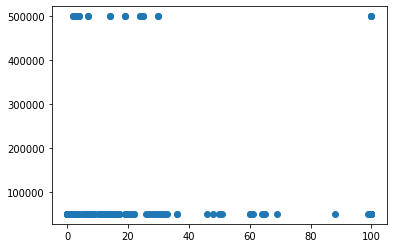

In [37]:
plt.scatter(competition_value, avg_monthly_searches)

In [38]:
adalite_df = pd.read_csv('adalite.csv')
adalite_df

Keyword Currency  \
0                                               adalite      USD   
1                                    digital currencies      USD   
2                                       hardware wallet      USD   
3                                 cryptocurrency wallet      USD   
4                                        cryptocurrency      USD   
5                                                crypto      USD   
6                                               coin360      USD   
7                                            binance us      USD   
8                                                trezor      USD   
9                                        worldcoinindex      USD   
10                                      safemoon crypto      USD   
11                                        safemoon coin      USD   
12                                cryptocurrency prices      USD   
13                                              pi coin      USD   
14                                            chia coin      USD   
15                                 crypto arbitrage vip      USD   
16                                    pi cryptocurrency      USD   
17                                        exodus wallet      USD   
18                                    crypto market cap      USD   
19                                     pi network price      USD   
20                                        crypto market      USD   
21                                            shib coin      USD   
22                                              altcoin      USD   
23                                        crypto wallet      USD   
24                                           nft crypto      USD   
25                                           ada crypto      USD   
26                                cryptocurrency market      USD   
27                                        crypto mining      USD   
28                                     shiba inu crypto      USD   
29                                  best cryptocurrency      USD   
30                                     safe moon crypto      USD   
31                                   best crypto wallet      USD   
32                                  cryptocurrency list      USD   
33                                        crypto prices      USD   
34                                 shiba inu coin price      USD   
35                best cryptocurrency to invest in 2021      USD   
36                                cryptocurrency stocks      USD   
37                                           coinswitch      USD   
38                                              litcoin      USD   
39                                     world coin index      USD   
40                                          tron crypto      USD   
41                                reddit cryptocurrency      USD   
42                                          defi crypto      USD   
43                                   top cryptocurrency      USD   
44                                           vet crypto      USD   
45                                       voyager crypto      USD   
46                                      live coin watch      USD   
47                                        trezor wallet      USD   
48                                safemoon crypto price      USD   
49                                     safemoon binance      USD   
50                                            pi crypto      USD   
51                                        gemini crypto      USD   
52                                       bonfire crypto      USD   
53                                       kishu inu coin      USD   
54                                          holo crypto      USD   
55                                        reddit crypto      USD   
56                                        paypal crypto      USD   
57                                          pi currency      USD   
58                                  

In [54]:
adalite_above500 = adalite_df.loc[df['Avg. monthly searches'] >= 500000]

In [55]:
adalite_above500

Keyword Currency  Avg. monthly searches  \
1               digital currencies      USD                50000.0   
3            cryptocurrency wallet      USD                 5000.0   
5                           crypto      USD               500000.0   
9                   worldcoinindex      USD                50000.0   
10                 safemoon crypto      USD               500000.0   
12           cryptocurrency prices      USD                50000.0   
15            crypto arbitrage vip      USD                50000.0   
413                 libra currency      USD                 5000.0   
706               handshake crypto      USD                  500.0   
1320  emerging cryptocurrency 2021      USD                   50.0   

     Competition  Competition (indexed value)  Top of page bid (low range)  \
1            Low                         30.0                         1.31   
3           High                        100.0                         3.38   
5            Low                         24.0                         1.80   
9            Low                          0.0                         3.09   
10           Low                         25.0                         2.74   
12           Low                         14.0                         1.19   
15           Low                          6.0                         2.00   
413          Low                          8.0                         2.33   
706          Low                         14.0                         3.42   
1320         Low                         20.0                         1.10   

      Top of page bid (high range)  Ad impression share  \
1                             5.43                  NaN   
3                            16.85                  NaN   
5                             9.93                  NaN   
9                            16.71                  NaN   
10                           22.15                  NaN   
12                           13.45                  NaN   
15                           23.44                  NaN   
413                          17.73                  NaN   
706                          20.15                  NaN   
1320                          3.77                  NaN   

      Organic impression share  Organic average position  In account?  \
1                          NaN                       NaN          NaN   
3                          NaN                       NaN          NaN   
5                          NaN                       NaN          NaN   
9                          NaN                       NaN          NaN   
10                         NaN                       NaN          NaN   
12                         NaN                       NaN          NaN   
15                         NaN                       NaN          NaN   
413                        NaN                       NaN          NaN   
706                        NaN                       NaN          NaN   
1320                       NaN                       NaN          NaN   

      In plan?  Searches: Jun 2020  Searches: Jul 2020  Searches: Aug 2020  \
1          NaN                 NaN                 NaN                 NaN   
3          NaN                 NaN                 NaN                 NaN   
5          NaN                 NaN                 NaN                 NaN   
9          NaN                 NaN                 NaN                 NaN   
10         NaN                 NaN                 NaN                 NaN   
12         NaN                 NaN                 NaN                 NaN   
15         NaN                 NaN                 NaN                 NaN   
413        NaN                 NaN                 NaN                 NaN   
706        NaN                 NaN                 NaN                 NaN   
1320       NaN                 NaN                 NaN                 NaN   

      Searches: Sep 2020  Searches: Oct 2020  Searches: Nov 2020  \
1               

In [58]:
keywords_adalite = np.array(adalite_above500['Keyword']).reshape(-1,1)

In [60]:
keywords_adalite = [element for sublst in keywords_adalite for element in sublst]
# get the keywords into a txt file
myText = open(r'/Users/waelivie/Desktop/armada-seo-research/adalite.txt','w')
for i in keywords_adalite:
    myText.write(i + '\n')

myText.close()